# BRAN2020 clim demo tests

Date: 11 April, 2024

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

### BRAN2020 is on the order of 100TB of float data over nearly 9000 `netcdf` file assests in total.

#### required packages

In [1]:
import intake
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#more plotting
import matplotlib.dates as mdates
#import seaborn as sns

In [2]:
xr.__version__

'2024.3.0'

#### ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### start a local Dask client

In [4]:
import dask
import distributed

with dask.config.set({"distributed.scheduler.worker-saturation": 1.0,
                      "distributed.nanny.pre-spawn-environ.MALLOC_TRIM_THRESHOLD_": 0,
                    "logging.distributed'": "error"}):
    client = distributed.Client()

# load the results:

In [5]:
results_path = '/g/data/es60/users/thomas_moore/clim_demo_results/daily/draft_delivery/'
mld_file = results_path+'BRAN2020_clim_demo_mld.nc'
eta_t_file = results_path+'holding/BRAN2020_clim_demo_eta_t.nc'
#temp_file = results_path+'BRAN2020_clim_demo_temp.nc'

In [6]:
mld_stats_dataset = xr.open_dataset(mld_file,chunks={})
eta_t_stats_dataset = xr.open_dataset(eta_t_file,chunks={})

In [8]:
### plot directory
plot_directory = '/g/data/es60/users/thomas_moore/clim_demo_results/plots/'

# run some tests

### are ENSO masked quants different than unmasked?

In [9]:
a_da = mld_stats_dataset.mean_el_nino_mld
b_da = mld_stats_dataset.mean_la_nina_mld
c_da = mld_stats_dataset.mean_mld

In [13]:
# Compare the three xarray data arrays, ignoring NaN values
are_different = (a_da.notnull() & b_da.notnull() & c_da.notnull()) & ((a_da != b_da) | (a_da != c_da) | (b_da != c_da))

# Confirm they are all different at all points
all_different = are_different.all().values

# Print the result
print("Are all data arrays different from each other?", all_different)

Are all data arrays different from each other? False


In [ ]:
# Plotting a_da against b_da
plt.scatter(a_da, b_da, label='a_da vs b_da')
plt.xlabel('a_da')
plt.ylabel('b_da')
plt.legend()
plt.show()

# Plotting a_da against c_da
plt.scatter(a_da, c_da, label='a_da vs c_da')
plt.xlabel('a_da')
plt.ylabel('c_da')
plt.legend()
plt.show()

# Plotting b_da against c_da
plt.scatter(b_da, c_da, label='b_da vs c_da')
plt.xlabel('b_da')
plt.ylabel('c_da')
plt.legend()
plt.show()

## 3D temperature

In [ ]:
# Define a dictionary to map variable names to colors
temp_color_dict = {
    'mean_temp': 'black',
    'min_temp': 'navy',
    'max_temp': 'red',
    'std_temp': 'lightgrey',
    'median_temp':'darkgrey',
    'quantile_05_temp':'lightblue' ,
    'quantile_95_temp': 'orange'
}

In [ ]:
# Get the list of variables in the dataset
variables = list(temp_stats_equator_march.data_vars)
variables = ['max_temp', 'quantile_95_temp', 'median_temp', 'std_temp', 'mean_temp', 'quantile_05_temp', 'min_temp']

# Plot line for each variable
for variable in variables:
    color = temp_color_dict.get(variable, 'black')  # Use 'black' as default color if variable is not in the dictionary
    temp_stats_equator_march[variable].sel(st_ocean=0,method='nearest').plot.line(x='xt_ocean', 
                                                                                    label=variable, color=color)

# Add text to a specific location
plt.text(25, 60, 'AFRICA', fontsize=12, color='brown', rotation=90)
plt.text(105, 80, 'INDONESIA', fontsize=12, color='brown', rotation=90)
plt.text(290, 40, 'SOUTH AMERICA', fontsize=12, color='brown', rotation=90)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title
plt.title('Temp Statistics at Equator in March\nBRAN2020 reanalysis at surface')
# Set the background color to black
#plt.gca().set_facecolor('lightgrey')

# Save the plot as PNG
plt.savefig(plot_directory+'Temp-Statistics-at-Equator-surface-in-March.png', dpi=300,bbox_inches='tight')
# Show the plot
plt.show()


# mld

In [9]:
# Define a dictionary to map variable names to colors
mld_color_dict = {
    'mean_mld': 'black',
    'min_mld': 'navy',
    'max_mld': 'red',
    'std_mld': 'lightgrey',
    'median_mld':'darkgrey',
    'quantile_05_mld':'lightblue' ,
    'quantile_95_mld': 'orange'
}

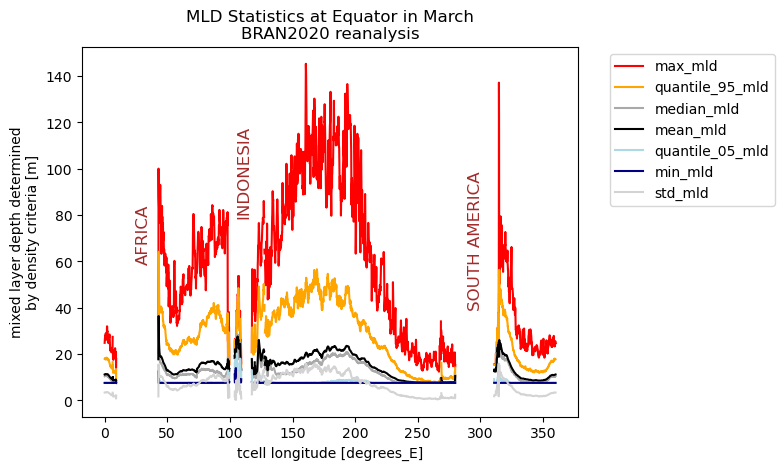

In [10]:


# Get the list of variables in the dataset
variables = list(mld_stats_equator_march.data_vars)
variables = ['max_mld', 'quantile_95_mld', 'median_mld', 'mean_mld', 'quantile_05_mld', 'min_mld', 'std_mld']

# Plot line for each variable
for variable in variables:
    color = mld_color_dict.get(variable, 'black')  # Use 'black' as default color if variable is not in the dictionary
    mld_stats_equator_march[variable].plot.line(x='xt_ocean', label=variable, color=color)

# Add text to a specific location
plt.text(25, 60, 'AFRICA', fontsize=12, color='brown', rotation=90)
plt.text(105, 80, 'INDONESIA', fontsize=12, color='brown', rotation=90)
plt.text(290, 40, 'SOUTH AMERICA', fontsize=12, color='brown', rotation=90)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title
plt.title('MLD Statistics at Equator in March\nBRAN2020 reanalysis')
# Set the background color to black
#plt.gca().set_facecolor('lightgrey')

# Save the plot as PNG
plt.savefig(plot_directory+'MLD-Statistics-at-Equator-in-March.png', dpi=300,bbox_inches='tight')
# Show the plot
plt.show()


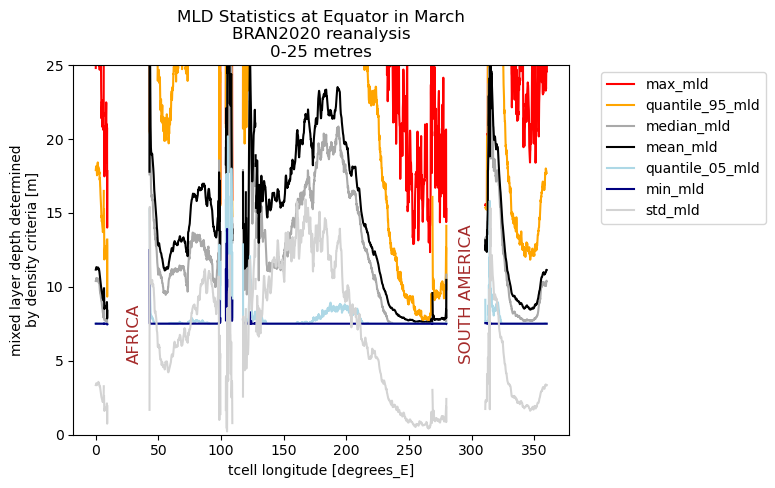

In [11]:
# Plot line for each variable
for variable in variables:
    color = mld_color_dict.get(variable, 'black')  # Use 'black' as default color if variable is not in the dictionary
    mld_stats_equator_march[variable].plot.line(x='xt_ocean', label=variable, color=color)

plt.ylim(0, 25)  # Set the y-axis limits to 0 and 25 metres
# Add text to a specific location
plt.text(25, 5, 'AFRICA', fontsize=12, color='brown', rotation=90)
plt.text(290, 5, 'SOUTH AMERICA', fontsize=12, color='brown', rotation=90)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title
plt.title('MLD Statistics at Equator in March\nBRAN2020 reanalysis\n0-25 metres')
# Set the background color to black
#plt.gca().set_facecolor('lightgrey')
# print
plt.savefig(plot_directory+'MLD-Statistics-at-Equator-in-March-25m.png', dpi=300,bbox_inches='tight')
# Show the plot
plt.show()



# compare ENSO phases

In [12]:
# Define a dictionary to map variable names to colors
mld_ENSO_color_dict = {
    'mean_mld': 'black',
    'mean_el_nino_mld': 'red',
    'mean_la_nina_mld': 'blue'
}
mld_ENSO_style_dict = {
    'mean_mld': '-',
    'mean_el_nino_mld': '-',
    'mean_la_nina_mld': '-'
}
mld_ENSO_width_dict = {
    'mean_mld': '0.5',
    'mean_el_nino_mld': '0.5',
    'mean_la_nina_mld': '0.5'
}
variables = ['mean_el_nino_mld','mean_mld','mean_la_nina_mld']

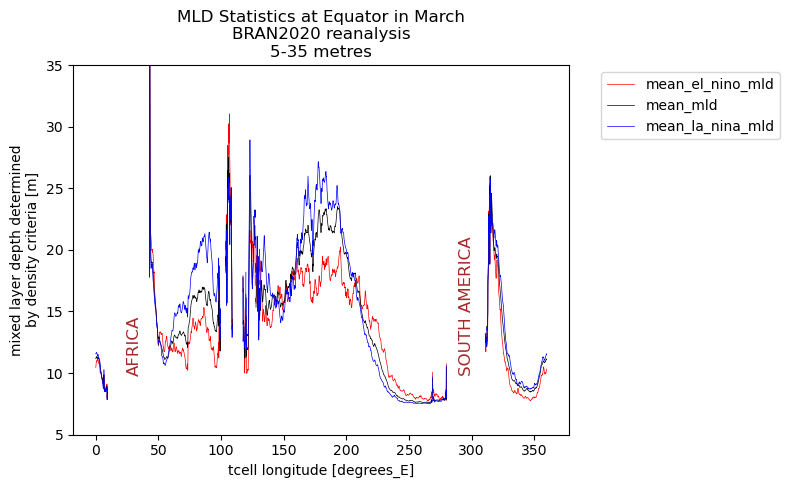

In [13]:
# Plot line for each variable
for variable in variables:
    color = mld_ENSO_color_dict.get(variable, 'black')  # Use 'black' as default color if variable is not in the dictionary
    width = mld_ENSO_width_dict.get(variable, 1)
    style = mld_ENSO_style_dict.get(variable, '-')
    mld_stats_equator_march[variable].plot.line(x='xt_ocean', label=variable, color=color, linewidth=width, linestyle=style)

plt.ylim(5, 35)  # Set the y-axis limits
# Add text to a specific location
plt.text(25, 10, 'AFRICA', fontsize=12, color='brown', rotation=90)
plt.text(290, 10, 'SOUTH AMERICA', fontsize=12, color='brown', rotation=90)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title
plt.title('MLD Statistics at Equator in March\nBRAN2020 reanalysis\n5-35 metres')
# Set the background color to black
#plt.gca().set_facecolor('lightgrey')
plt.gca().set_aspect('auto')
# print
plt.savefig(plot_directory+'MLD-mean-ENSO-stats-at-Equator-in-March-35m.png', dpi=300,bbox_inches='tight')
# Show the plot
plt.show()


# sanity check MLD above

In [14]:
BRAN_mld = xr.open_zarr('/scratch/es60/ard/reanalysis/BRAN2020/ARD/BRAN2020-daily-mld-chunk4time-v04042024.zarr',consolidated=True)

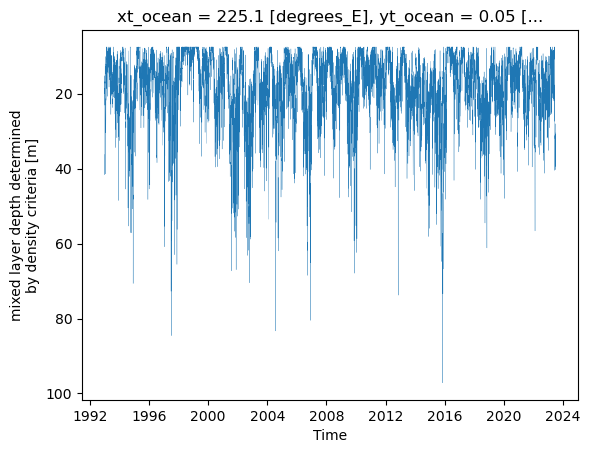

In [15]:
timeseries = BRAN_mld.mld.sel({'yt_ocean':0,'xt_ocean':225},method='nearest')
timeseries.plot(linewidth=0.2)
plt.gca().invert_yaxis()
plt.gca().set_aspect('auto')

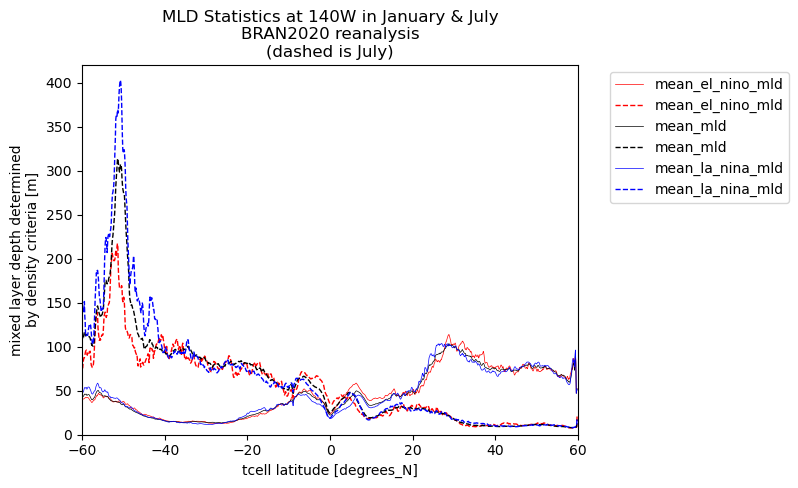

In [16]:
# Plot line for each variable
for variable in variables:
    color = mld_ENSO_color_dict.get(variable, 'black')  # Use 'black' as default color if variable is not in the dictionary
    width = mld_ENSO_width_dict.get(variable, 1)
    style = mld_ENSO_style_dict.get(variable, '-')
    mld_stats_dataset[variable].isel(month=0).sel(xt_ocean=220,method='nearest').plot.line(x='yt_ocean', label=variable, color=color, linewidth=width, linestyle=style)
    mld_stats_dataset[variable].isel(month=6).sel(xt_ocean=220,method='nearest').plot.line(x='yt_ocean', label=variable, color=color, linewidth=1, linestyle='--')

plt.xlim(-60, 60)  # Set the x-axis limits
plt.ylim(0, 420)  
# Add text to a specific location
#plt.text(25, 10, 'AFRICA', fontsize=12, color='brown', rotation=90)
#plt.text(290, 10, 'SOUTH AMERICA', fontsize=12, color='brown', rotation=90)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title
plt.title('MLD Statistics at 140W in January & July\nBRAN2020 reanalysis\n(dashed is July)')
# Set the background color to black
#plt.gca().set_facecolor('lightgrey')
plt.gca().set_aspect('auto')
# print
plt.savefig(plot_directory+'MLD-mean-ENSO-stats-at-140W-in-January-July.png', dpi=300,bbox_inches='tight')
# Show the plot
plt.show()

# eta t

In [17]:
# Define a dictionary to map variable names to colors
eta_t_color_dict = {
    'mean_eta_t': 'black',
    'min_eta_t': 'navy',
    'max_eta_t': 'red',
    'std_eta_t': 'lightgrey',
    'median_eta_t':'darkgrey',
    'quantile_05_eta_t':'lightblue' ,
    'quantile_95_eta_t': 'orange'
}

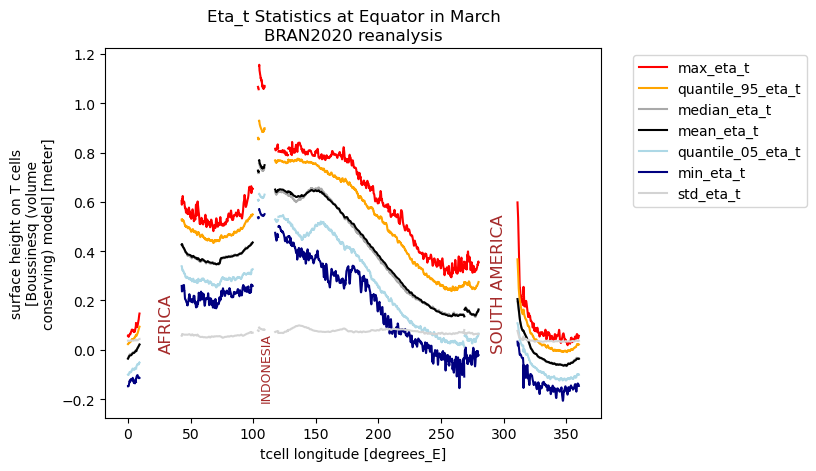

In [18]:
# Get the list of variables in the dataset
variables = list(eta_t_stats_equator_march.data_vars)
variables = ['max_eta_t', 'quantile_95_eta_t', 'median_eta_t', 'mean_eta_t', 'quantile_05_eta_t', 'min_eta_t', 'std_eta_t']

# Plot line for each variable
for variable in variables:
    color = eta_t_color_dict.get(variable, 'black')  # Use 'black' as default color if variable is not in the dictionary
    eta_t_stats_equator_march[variable].plot.line(x='xt_ocean', label=variable, color=color)

# Add text to a specific location
plt.text(25, 0, 'AFRICA', fontsize=12, color='brown', rotation=90)
plt.text(105, -0.2, 'INDONESIA', fontsize=9, color='brown', rotation=90)
plt.text(290, 0, 'SOUTH AMERICA', fontsize=12, color='brown', rotation=90)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title
plt.title('Eta_t Statistics at Equator in March\nBRAN2020 reanalysis')
# Set the background color to black
#plt.gca().set_facecolor('lightgrey')
# Save the plot as PNG
plt.savefig(plot_directory+'Eta_t-Statistics-at-Equator-in-March.png', dpi=300,bbox_inches='tight')
# Show the plot
plt.show()


# `eta_t` compare ENSO phases

In [19]:
# Define a dictionary to map variable names to colors
eta_t_ENSO_color_dict = {
    'mean_eta_t': 'black',
    'mean_el_nino_eta_t': 'red',
    'mean_la_nina_eta_t': 'blue'
}
eta_t_ENSO_style_dict = {
    'mean_eta_t': '-',
    'mean_el_nino_eta_t': '--',
    'mean_la_nina_eta_t': '--'
}
eta_t_ENSO_width_dict = {
    'mean_eta_t': '1',
    'mean_el_nino_eta_t': '0.5',
    'mean_la_nina_eta_t': '0.5'
}
variables = ['mean_el_nino_eta_t','mean_eta_t','mean_la_nina_eta_t']

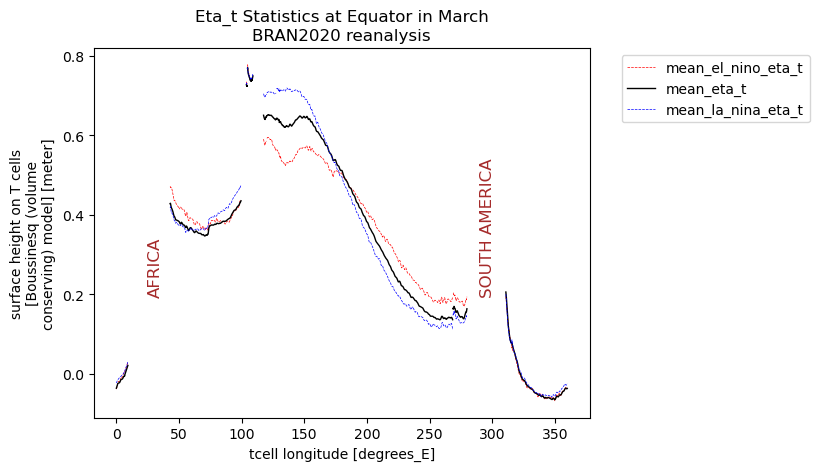

In [20]:
# Plot line for each variable
for variable in variables:
    color = eta_t_ENSO_color_dict.get(variable, 'black')  # Use 'black' as default color if variable is not in the dictionary
    width = eta_t_ENSO_width_dict.get(variable, 1)
    style = eta_t_ENSO_style_dict.get(variable, '-')
    eta_t_stats_equator_march[variable].plot.line(x='xt_ocean', label=variable, color=color, linewidth=width, linestyle=style)


# Add text to a specific location
plt.text(25, 0.2, 'AFRICA', fontsize=12, color='brown', rotation=90)
plt.text(290, 0.2, 'SOUTH AMERICA', fontsize=12, color='brown', rotation=90)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title
plt.title('Eta_t Statistics at Equator in March\nBRAN2020 reanalysis')
# Set the background color to black
#plt.gca().set_facecolor('lightgrey')
plt.gca().set_aspect('auto')
# print
plt.savefig(plot_directory+'Eta_t-mean-ENSO-stats-at-Equator-in-March-35m.png', dpi=300,bbox_inches='tight')
# Show the plot
plt.show()


### eta t maps

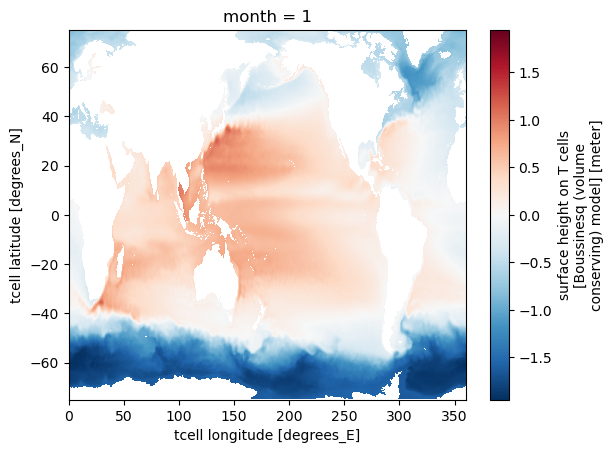

In [21]:
eta_t_stats_dataset.mean_eta_t.isel(month=0).plot()

In [ ]:
import cartopy.crs as ccrs
from streamjoy import stream

if __name__ == "__main__":
    streams = []
    for month in range(0, 11):
        
        streams.append(
            stream(
                eta_t_stats_dataset,
                var="mean_eta_t",
                dim="month",
                max_frames=-1,
                renderer_kwargs=dict(
                    cmap="RdBu_r",
                    vmin=-5,
                    vmax=5,
                    subplot_kws=dict(
                        projection=ccrs.Orthographic(central_longitude=-150),
                        facecolor="gray",
                    ),
                    transform=ccrs.PlateCarree(),
                ),
            )
        )

    joined_stream = sum(streams)
    joined_stream.write(plot_directory+'eta_t.gif')

In [ ]:
eta_t_stats_equator.mean_eta_t.plot.line(x='xt_ocean')

In [ ]:
temp_chunk4time = xr.open_zarr(zarr_path+temp_chunk4time_zarr,consolidated=True)

In [ ]:
temp_chunk4time

In [ ]:
%%time
result = temp_chunk4time.temp.mean(['Time','st_ocean'])

In [ ]:
%time
result = result.compute()

In [ ]:
result.plot()

# ARD workflow

### read paths from config file

#### [ you will need to specifiy your correct path for the `data-catalogue/config.ini` file ]

In [ ]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config file
#########
#### you will need to specifiy your correct path the the `data-catalogue/config.ini` file 
#########
config.read('./code/BRAN2020-intake-catalog/config.ini')

# Get the value of a variable
catalog_path = config.get('paths', 'catalog_path')

In [ ]:
catalog_path

In [ ]:
BRAN2020_catalog = intake.open_esm_datastore(catalog_path+'BRAN2020.json',columns_with_iterables=['variable'])

In [ ]:
BRAN2020_catalog

In [ ]:
BRAN2020_catalog.unique()['source']

In [ ]:
BRAN2020_catalog.unique()['domain']

In [ ]:
BRAN2020_catalog.unique()['time_period']

In [ ]:
var_list = BRAN2020_catalog.unique()['variable']
var_list.sort()
df = pd.DataFrame(var_list, columns=['BRAN2020 Variables'])
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

In [ ]:
search = BRAN2020_catalog.search(variable=['mld'],time_period=['daily'])

In [ ]:
search.unique()['variable']

In [ ]:
search

In [ ]:
search.df

### Out of some 9000 files we now have narrowed down the just the 366 that have the information we need

#### We can now load all that data into a single 240GB "lazy" `xarray` object for further reduction and analysis

In [ ]:
%%time
xarray_open_kwargs = {"chunks": {"time": 1, "xt_ocean": 3600, "yt_ocean": 1500}}
DS=search.to_dask(xarray_open_kwargs=xarray_open_kwargs)

In [ ]:
DS

In [ ]:
DS.nbytes/1e9

## ARD - write zarr & chunk & write zarr

In [ ]:
BRAN2020_ard_path = '/scratch/es60/ard/reanalysis/BRAN2020/ARD/2D/'
ard_file_ID = 'BRAN2020-daily-mld-v04042024.zarr'

In [ ]:
%%time
DS.to_zarr(BRAN2020_ard_path+ard_file_ID,consolidated=True)
# ----- Client(threads_per_worker=1) -------
# CPU times: user 2min 26s, sys: 29.9 s, total: 2min 56s
# Wall time: 13min 1s
# ----- Client() -------
# CPU times: user 1min 53s, sys: 18.1 s, total: 2min 11s
# Wall time: 14min 3s

In [ ]:
!touch /scratch/es60/ard/reanalysis/BRAN2020/ARD/2D/finished_BRAN2020-mld-base-zarr.log

## RELOAD in ARD collection

In [ ]:
BRAN2020_daily_var = xr.open_zarr(BRAN2020_ard_path+ard_file_ID,consolidated=True)

In [ ]:
BRAN2020_daily_var

## CHUNK for time and WRITE zarr

### "Consider either rechunking using `chunk()`, deleting or modifying `encoding['chunks']`"

In [ ]:
def remove_zarr_encoding(DS):
    for var in DS:
        DS[var].encoding = {}

    for coord in DS.coords:
        DS[coord].encoding = {}
    return DS

In [ ]:
ard_rcTime_file_ID = 'BRAN2020-daily-mld-chunk4time-v04042024.zarr'

In [ ]:
BRAN2020_daily_var_rcTime =  BRAN2020_daily_var.chunk({'Time':-1,'xt_ocean':9,'yt_ocean':1500})
BRAN2020_daily_var_rcTime

In [ ]:
BRAN2020_daily_var_rcTime = remove_zarr_encoding(BRAN2020_daily_var_rcTime)

In [ ]:
%%time
BRAN2020_daily_var_rcTime.to_zarr(BRAN2020_ard_path+ard_rcTime_file_ID,consolidated=True)

In [ ]:
!touch /scratch/es60/ard/reanalysis/BRAN2020/ARD/2D/finished_BRAN2020-mld-rechunk-zarr.log

# rechunker approach

In [ ]:
input_ds = BRAN2020_daily_var
target_chunks = {'Time':-1,'xt_ocean':9,'yt_ocean':1500}
max_mem = "2GB"

target_store = BRAN2020_ard_path+ard_rcTime_file_ID
temp_store = "/scratch/es60/ard/rechunker_scratch/rechunker-tmp.zarr"

# need to remove the existing stores or it won't work
!rm -rf /scratch/es60/ard/rechunker_scratch/rechunker-tmp.zarr

# rechunk directly from dataset this time
rechunk_plan = rechunk(
    input_ds, target_chunks, max_mem, target_store, temp_store=temp_store
)
rechunk_plan

In [ ]:
%%time
rechunk_plan.execute()

In [ ]:
!touch /scratch/es60/ard/reanalysis/BRAN2020/ARD/2D/finished_BRAN2020-mld-rechunker-zarr.log

In [ ]:
zarr.consolidate_metadata(target_store)

## end ARD workflow $\Uparrow$

# begin post-processing workflow $\Downarrow$

## load in zarr collection

In [ ]:
var_chunked_time = xr.open_zarr(BRAN2020_ard_path + ard_rcTime_file_ID,consolidated=True)
var_chunked_time

## basic functions

In [ ]:
def get_bran_monthly_climatologies(xr_object,time_coord_name = 'Time'):
    monthly_climatologies = xr_object.groupby(time_coord_name+'.month').mean(dim=time_coord_name,keep_attrs = True,method="cohorts", engine="flox")
    result = data.groupby('time').temperature.agg(['mean', 'sum'])
    
return result



# Climatology

In [ ]:
temp_monthly_climatology = get_monthly_climatology(temp_chunked_time, time_coord_name = 'Time')
temp_monthly_climatology

In [ ]:
temp_monthly_climatology_rc = temp_monthly_climatology.chunk({'st_ocean':10,'xt_ocean':3600,'month':1})

In [ ]:
%%time
temp_monthly_climatology = temp_monthly_climatology.compute()

# CPU times: user 32.1 s, sys: 17.9 s, total: 49.9 s
# Wall time: 2min 20s
#

# Anomaly

In [ ]:
temp_anomaly = get_monthly_anomaly(temp_chunked,temp_monthly_climatology_rc,time_coord_name='Time')

In [ ]:
temp_anomaly

# define El Nino and La Nina using NCAR ONI data

In [ ]:
ONI_DF = pd.read_csv('/g/data/xv83/users/tm4888/data/ENSO/NCAR_ONI.csv')
ONI_DF.set_index('datetime',inplace=True)
ONI_DF.index = pd.to_datetime(ONI_DF.index)
el_nino_threshold = 0.5
la_nina_threshold = -0.5
el_nino_threshold_months = ONI_DF["ONI"].ge(el_nino_threshold)
la_nina_threshold_months = ONI_DF["ONI"].le(la_nina_threshold) 
ONI_DF = pd.concat([ONI_DF, el_nino_threshold_months.rename('El Nino threshold')], axis=1)
ONI_DF = pd.concat([ONI_DF, la_nina_threshold_months.rename('La Nina threshold')], axis=1)
ONI_DF = pd.concat([ONI_DF, el_nino_threshold_months.diff().ne(0).cumsum().rename('El Nino event group ID')], axis=1)
ONI_DF = pd.concat([ONI_DF, la_nina_threshold_months.diff().ne(0).cumsum().rename('La Nina event group ID')], axis=1)

In [ ]:
El_Nino_Series = ONI_DF.groupby('El Nino event group ID')['ONI'].filter(lambda x: len(x) >= 5,dropna=False).where(ONI_DF['El Nino threshold'] == True)
ONI_DF = pd.concat([ONI_DF, El_Nino_Series.rename('El Nino')], axis=1)
La_Nina_Series = ONI_DF.groupby('La Nina event group ID')['ONI'].filter(lambda x: len(x) >= 5,dropna=False).where(ONI_DF['La Nina threshold'] == True)
ONI_DF = pd.concat([ONI_DF, La_Nina_Series.rename('La Nina')], axis=1)
ONI_DF

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), layout='constrained')
ax.plot(ONI_DF.index,ONI_DF['El Nino'])
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.title('ONI El Nino events') 
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), layout='constrained')
ax.plot(ONI_DF.index,ONI_DF['La Nina'])
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.title('ONI La Nina events') 
plt.show()

## heatmap

### make table for average over certain region

In [ ]:
%%time
max_lat = 5.0
min_lat = -5.0
max_lon = 240
min_lon = 190
LatIndexer, LonIndexer = 'yt_ocean', 'xt_ocean'
SliceData = temp_anomaly.temp.isel(st_ocean=0).sel(**{LatIndexer: slice(min_lat, max_lat),
                        LonIndexer: slice(min_lon, max_lon)})
SliceData = SliceData.chunk({'Time':-1,'yt_ocean':-1,'xt_ocean':-1,})
# THIS CURRENTLY IGNORES GRID AREA CORRECTION 
spatial_mean_of_ONI_anomaly = SliceData.mean({'yt_ocean','xt_ocean'})
spatial_mean_of_ONI_anomaly = spatial_mean_of_ONI_anomaly.compute()

In [ ]:
spatial_mean_of_ONI_anomaly.plot()

In [ ]:
spatial_mean_of_ONI_anomaly_DF = spatial_mean_of_ONI_anomaly.to_dataframe()
spatial_mean_of_ONI_anomaly_DF['year'] = pd.DatetimeIndex(spatial_mean_of_ONI_anomaly_DF.index).year
spatial_mean_of_ONI_anomaly_DF

In [ ]:
heatmap_data = spatial_mean_of_ONI_anomaly_DF.pivot_table(index='month', columns='year', values='temp')

In [ ]:
heatmap_data

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='RdBu_r', square=True,vmin=-2.5, vmax=2.5,linewidth=.5)
plt.title('Month by Year BRAN2020 anomalies in ONI (Nino3.4) region')
plt.show()

## stacked heatmap plot

In [ ]:
ONI_DF_BRANtime = ONI_DF['1993-01':'2022-12']

In [ ]:
event_data_EN = ONI_DF_BRANtime.pivot_table(index='month', columns='year', values='El Nino',dropna=False).fillna('')
event_data_LN = ONI_DF_BRANtime.pivot_table(index='month', columns='year', values='La Nina',dropna=False).fillna('')

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(heatmap_data, annot=False,cmap='RdBu_r', square=True,vmin=-2.5, vmax=2.5,linewidth=.5)
sns.heatmap(heatmap_data, annot=event_data_LN, annot_kws={'va':'top'}, fmt="", cbar=False,cmap='RdBu_r', square=True,vmin=-2.5, vmax=2.5,linewidth=.5)
sns.heatmap(heatmap_data, annot=event_data_EN, annot_kws={'va':'bottom'}, fmt="", cbar=False,cmap='RdBu_r', square=True,vmin=-2.5, vmax=2.5,linewidth=.5)
plt.title('Month by Year BRAN2020 anomalies in ONI (Nino3.4) region\n ONI values shown for defined ENSO events')

#### count of events in BRAN2020 period
El Nino = 8 events ( weak - strong ) as defined by ONI<br>
La Nina = 10 events ( weak - strong ) as defined by ONI <br>
El Nino months total = 70 = 19%
La Nina months total = 119 = 33%
Neutral months total = 171 = 48%


In [ ]:
ONI_DF_BRANtime 

# filter BRAN2020 data by ENSO

In [ ]:
ONI_DF_BRANtime = ONI_DF['1993-01':'2022-12']
ONI_DF_BRANtime['El Nino LOGICAL'] = ONI_DF_BRANtime['El Nino'].notnull()
ONI_DF_BRANtime['La Nina LOGICAL'] = ONI_DF_BRANtime['La Nina'].notnull()
ONI_DF_BRANtime

In [ ]:
El_Nino_mask = ONI_DF_BRANtime['El Nino LOGICAL']
El_Nino_mask = El_Nino_mask.to_xarray()
El_Nino_mask = El_Nino_mask.rename({'datetime':'Time'})
sync_Time = temp_chunked_time.Time
El_Nino_mask['Time'] = sync_Time

In [ ]:
La_Nina_mask = ONI_DF_BRANtime['La Nina LOGICAL']
La_Nina_mask = La_Nina_mask.to_xarray()
La_Nina_mask = La_Nina_mask.rename({'datetime':'Time'})
sync_Time = temp_chunked_time.Time
La_Nina_mask['Time'] = sync_Time

In [ ]:
ONI_DF_BRANtime['Neutral LOGICAL'] = (ONI_DF_BRANtime['El Nino LOGICAL'] == False) & (ONI_DF_BRANtime['La Nina LOGICAL'] == False)

In [ ]:
ONI_DF_BRANtime['El Nino LOGICAL'].sum()

In [ ]:
ONI_DF_BRANtime['La Nina LOGICAL'].sum()

In [ ]:
ONI_DF_BRANtime['Neutral LOGICAL'].sum()

# Test if they add to 360

In [ ]:
ONI_DF_BRANtime['El Nino LOGICAL'].sum() + ONI_DF_BRANtime['La Nina LOGICAL'].sum()+ONI_DF_BRANtime['Neutral LOGICAL'].sum() == 360

In [ ]:
ONI_DF_BRANtime

In [ ]:
El_Nino_BRAN2020_temp = temp_chunked_time.temp.where(El_Nino_mask)
La_Nina_BRAN2020_temp = temp_chunked_time.temp.where(La_Nina_mask)

In [ ]:
%%time
El_Nino_SST_mean = El_Nino_BRAN2020_temp.isel(st_ocean=0).mean('Time').compute()
La_Nina_SST_mean = La_Nina_BRAN2020_temp.isel(st_ocean=0).mean('Time').compute()

In [ ]:
plt.figure(figsize=(16,8))
(El_Nino_SST_mean-La_Nina_SST_mean).plot()
plt.title('Mean monthly BRAN2020 SST for El Nino - La Nina events')

## El Nino "climatology"

In [ ]:
%%time
El_Nino_temp_monthly_climatology = get_monthly_climatology(El_Nino_BRAN2020_temp, time_coord_name = 'Time')
El_Nino_temp_monthly_climatology_rc = El_Nino_temp_monthly_climatology.chunk({'st_ocean':10,'xt_ocean':3600,'month':1})
El_Nino_temp_monthly_climatology = El_Nino_temp_monthly_climatology.compute()


## La Nina "climatology"

In [ ]:
%%time
La_Nina_temp_monthly_climatology = get_monthly_climatology(La_Nina_BRAN2020_temp, time_coord_name = 'Time')
La_Nina_temp_monthly_climatology_rc = La_Nina_temp_monthly_climatology.chunk({'st_ocean':10,'xt_ocean':3600,'month':1})
La_Nina_temp_monthly_climatology = La_Nina_temp_monthly_climatology.compute()

In [ ]:
El_Nino_temp_monthly_climatology

In [ ]:
diff_EN_LN_climatology = El_Nino_temp_monthly_climatology - La_Nina_temp_monthly_climatology

In [ ]:
diff_EN_LN_climatology

In [ ]:
%%time
max_lat = 5.0
min_lat = -5.0
max_lon = 240
min_lon = 190
LatIndexer, LonIndexer = 'yt_ocean', 'xt_ocean'
SliceData = diff_EN_LN_climatology.isel(st_ocean=0).sel(**{LatIndexer: slice(min_lat, max_lat),
                        LonIndexer: slice(min_lon, max_lon)})
SliceData = SliceData.chunk({'month':-1,'yt_ocean':-1,'xt_ocean':-1,})
# THIS CURRENTLY IGNORES GRID AREA CORRECTION 
spatial_mean_diff_EN_LN = SliceData.mean({'yt_ocean','xt_ocean'})
spatial_mean_diff_EN_LN = spatial_mean_diff_EN_LN.compute()

In [ ]:
spatial_mean_diff_EN_LN.plot(ylim=[0,3])

In [ ]:
%%time
max_lat = 5.0
min_lat = -5.0
max_lon = 240
min_lon = 190
LatIndexer, LonIndexer = 'yt_ocean', 'xt_ocean'
SliceData = El_Nino_temp_monthly_climatology.isel(st_ocean=0).sel(**{LatIndexer: slice(min_lat, max_lat),
                        LonIndexer: slice(min_lon, max_lon)})
SliceData = SliceData.chunk({'month':-1,'yt_ocean':-1,'xt_ocean':-1,})
# THIS CURRENTLY IGNORES GRID AREA CORRECTION 
spatial_mean_EN = SliceData.mean({'yt_ocean','xt_ocean'})
spatial_mean_EN = spatial_mean_EN.compute()
spatial_mean_EN.plot()

# Mean, Median, Max , Min

In [ ]:
El_Nino_mean = El_Nino_BRAN2020_temp.mean('Time')
El_Nino_median = El_Nino_BRAN2020_temp.median('Time')
El_Nino_max = El_Nino_BRAN2020_temp.max('Time')
El_Nino_min = El_Nino_BRAN2020_temp.min('Time')
El_Nino_std = El_Nino_BRAN2020_temp.std('Time')
El_Nino_quant = El_Nino_BRAN2020_temp.quantile([0.05,0.95],skipna=True,dim='Time')

In [ ]:
%%time
El_Nino_quant.isel(quantile=0).isel(st_ocean=0).plot(robust=True,vmin=-1,vmax=35)

In [ ]:
%%time
El_Nino_quant.isel(quantile=1).isel(st_ocean=0).plot(robust=True,vmin=-1,vmax=35)

In [ ]:
def get_slice(xr_object)
    max_lat = 5.0
    min_lat = -5.0
    max_lon = 240
    min_lon = 190
    LatIndexer, LonIndexer = 'yt_ocean', 'xt_ocean'
    SliceData = xr_object.sel(**{LatIndexer: slice(min_lat, max_lat),
                        LonIndexer: slice(min_lon, max_lon)})

In [ ]:
El_Nino_min.isel(st_ocean=0).plot(robust=True,vmin=-1,vmax=35)

In [ ]:
El_Nino_max.isel(st_ocean=0).plot(robust=True,vmin=-1,vmax=35)

In [ ]:
diff = El_Nino_max.isel(st_ocean=0) - El_Nino_min.isel(st_ocean=0) 
diff.plot(robust=True)

In [ ]:
El_Nino_std.isel(st_ocean=0).plot(robust=True)

# The End

In [ ]:
client.shutdown()

## Plot current vectors for August

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from matplotlib import mlab, cm, gridspec
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline 

In [ ]:
%%time
# Define the u and v components of the currents
time_choice = 8
u = clim_uv.u.sel(month=time_choice)
v = clim_uv.v.sel(month=time_choice)
speed = np.sqrt(u**2 + v**2)

In [ ]:
#plot model data
transform = ccrs.PlateCarree()
cmap = 'Spectral_r'
cbar_label='current speed'
plot_data = speed

###
fig = plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
ax = plt.subplot(projection=ccrs.PlateCarree(180))
ax.set_extent([142,160, -25, -10], ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='white'))
ax.coastlines('50m',linewidth=0.5,edgecolor='grey')
plot_data.plot(transform=transform,cmap=cmap,cbar_kwargs={'label': cbar_label,'shrink':0.5},robust=True)

#plot u/v vectors
# Define the x and y coordinates
x = clim_uv.xu_ocean
y = clim_uv.yu_ocean
ax.quiver(x.values,y.values,u.values,v.values,transform=transform, units='x', width=0.01, scale=0.7, headwidth=2,alpha=0.2)
ax.set_title('BRAN2020 1993-2022\ncurrent speed \n August Climatology')